# Illustrate MCMC sampling

In [1]:
import os

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
sns.set_theme()

## Import inference results

In [10]:
# Import NLME inference results
directory = os.getcwd()
nlme_results = xr.load_dataset(
    directory + '/posteriors/1_nlme_inference_cancer_growth.nc')
samples = nlme_results['Mean Initial count'].values[0]

## Visualise trace and parameter histograms over time

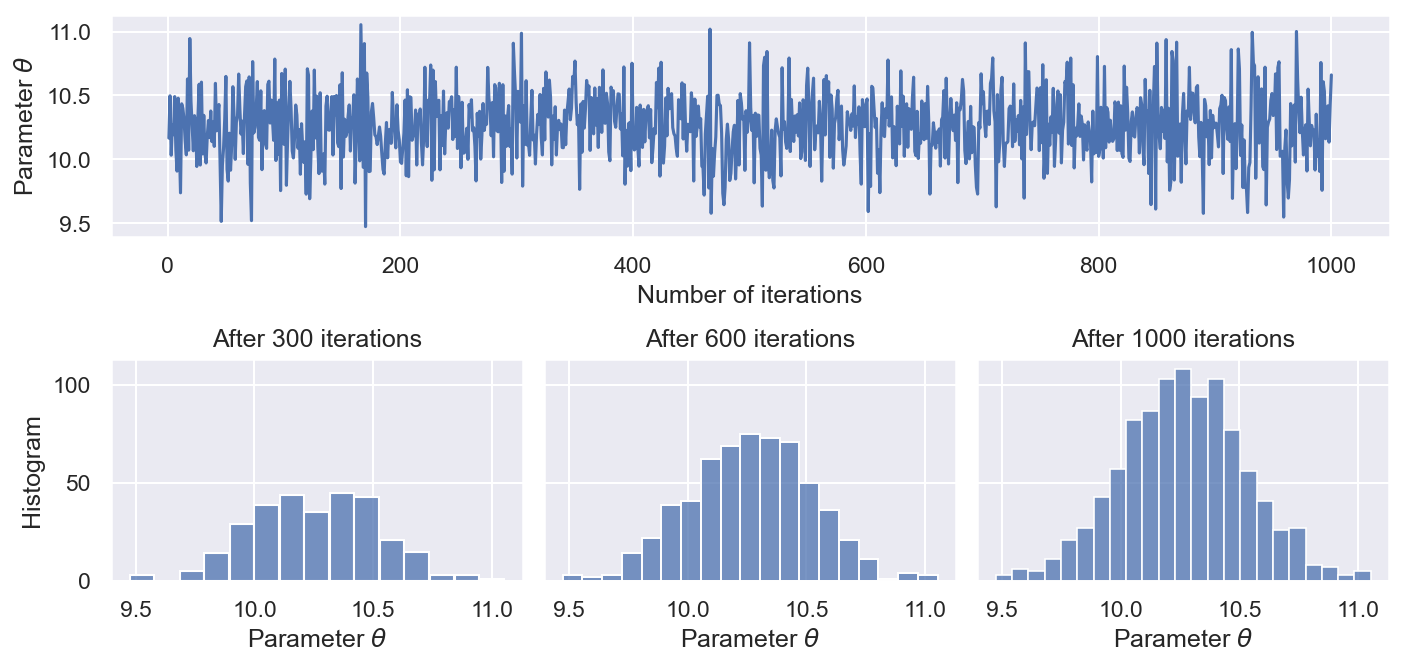

In [83]:
# Create layout
fontsize = 11
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 1000 // my_dpi), dpi=150)
outer = gridspec.GridSpec(2, 1, hspace=0.55)

# Create time series axes
inner1 = gridspec.GridSpecFromSubplotSpec(
    1, 3, subplot_spec=outer[1], wspace=0.05)

# Create axis for data
axes = []
axes.append(plt.Subplot(fig, outer[0]))

# Create axes for NLME inference results
axes.append(plt.Subplot(fig, inner1[0]))
axes.append(plt.Subplot(fig, inner1[1]))
axes.append(plt.Subplot(fig, inner1[2]))

axes[1].sharey(axes[2])
axes[1].sharex(axes[2])
axes[2].sharey(axes[3])
axes[2].sharex(axes[3])

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

# Plot trace
n_iterations = np.arange(1, len(samples) + 1)
axes[0].plot(n_iterations, samples)

# Plot historgrams
sns.histplot(samples[:300], ax=axes[1])
sns.histplot(samples[:600], ax=axes[2])
sns.histplot(samples, ax=axes[3])

# Labelling
axes[0].set_xlabel('Number of iterations')
axes[0].set_ylabel(r'Parameter $\theta$')
axes[1].set_xlabel(r'Parameter $\theta$')
axes[2].set_xlabel(r'Parameter $\theta$')
axes[3].set_xlabel(r'Parameter $\theta$')
axes[1].set_title('After 300 iterations')
axes[2].set_title('After 600 iterations')
axes[3].set_title('After 1000 iterations')
axes[2].set_yticklabels([])
axes[1].set_ylabel('Histogram')
axes[2].set_ylabel('')
axes[3].set_ylabel('')

# Export figure
plt.savefig(
    directory + '/000_mcmc_sampling.tif',
    bbox_inches='tight')
plt.savefig(
    directory + '/000_mcmc_sampling.pdf',
    bbox_inches='tight')

plt.show()